In [1]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator, LinearNDInterpolator

import rasterio

import rioxarray

import matplotlib.pyplot as plt

## Set model dimensions

In [2]:
# define bounding box
xmin, xmax, ymin, ymax = -955637.8812, 1034362.2443650428, 6342298.2975, 8922298.39436168
zmin, zmax = -8000.0, 1200.0

# resolution
dx, dy, dz = 10e3, 10e3, 100
# dx, dy, dz = 10e3, 10e3, 50
Nx, Ny, Nz = int((xmax-xmin)/dx), int((ymax-ymin)/dy), int((zmax-zmin)/dz)

### Create a grid to map top and bottom surfaces

In [3]:
x = np.arange(xmin, xmax, dx)
y = np.arange(ymin, ymax, dy)

xi, yi = np.meshgrid(x, y)

### import top and bottom surfaces 

In [4]:
data_dir = '/home/jovyan/workspace/GAB-Notebooks/Notebooks/data/'

numpy_directory = data_dir + "GAB_surfaces/NumPy/"

geotiff_directory = data_dir + "GAB_surfaces/GeoTiff/"

surface_filename_npz = numpy_directory + "{:s}.npz"
surface_filename_tiff = geotiff_directory + "{:s}.tiff"

In [5]:

with np.load(surface_filename_npz.format("AUSBATH09_AMG55_GDA94_500m_model_extent")) as npz:
    topo_interp = RegularGridInterpolator((npz['y'], npz['x']), npz['data'])
    
with rioxarray.open_rasterio(surface_filename_tiff.format("AUSBATH09_AMG55_GDA94_500m_model_extent")) as npz:
     topo_interp_tiff = RegularGridInterpolator((np.flipud(npz.sel(band=1).y.data), npz.sel(band=1).x.data), (npz.sel(band=1).data), bounds_error=False)

In [6]:


with np.load(surface_filename_npz.format("W910_BASEMENT_v1")) as npz:
    basement_interp = RegularGridInterpolator((npz['y'], npz['x']), npz['data'])
    
with rioxarray.open_rasterio(surface_filename_tiff.format("W910_BASEMENT_v1")) as npz:
    basement_interp_tiff = RegularGridInterpolator((np.flipud(npz.sel(band=1).y.data), npz.sel(band=1).x.data), (npz.sel(band=1).data), bounds_error=False)

In [24]:
local_topography = topo_interp((yi, xi))
local_basement = basement_interp_tiff((yi, xi))


local_basement[np.isnan(local_basement)] = 0.


# ensure basement is at least as deep as topography!
local_basement = np.minimum(local_basement, local_topography)


# subtract a thickness buffer
dz_min = 2e3
local_basement -= dz_min



min dz = 21.739130434782602, max dz = 126.3342739616162


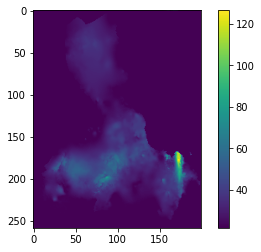

In [25]:
min_z = (local_topography - local_basement)/Nz
### remove nan values
# min_z[np.isnan(min_z)] = dz_min / Nz

print(f'min dz = {min_z.min()}, max dz = {min_z.max()}')



plt.figure(1)
plt.imshow(min_z)
plt.colorbar()

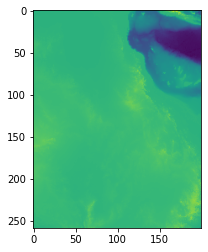

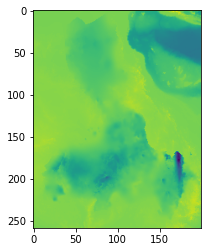

In [10]:
plt.figure(2)
plt.imshow(local_topography)
plt.figure(3)
plt.imshow(local_basement)

### Save to raster for visualisation in GIS program

In [11]:
# import rasterio as rio    

# with rio.open(geotiff_directory + 'AUSBATH09_AMG55_GDA94_500m_model_extent.tiff') as src:
#     ras_data = src.read()
#     ras_meta = src.profile

# # make any necessary changes to raster properties, e.g.:
# ras_meta['dtype'] = "int32"
# ras_meta['nodata'] = -99


# with rio.open(geotiff_directory + f'{int(dx)}dx{int(dy)}dy{int(dz)}dz.tif', 'w', **ras_meta) as dst:
#     dst.write(min_z, 1)
    
